# Standard Error of the Mean and its correction for finite populations

The standard error of a statistic is an estimate of its variability, or the amount of inherent random error in its measurement.
Hence, the _standard error of the mean_ (SEM) is an indication of the precision of the sample mean as an estimator of the population mean: it tells us how far off we are likely to be from the true population mean, *due to sampling variability alone*.

To understand the standard error of the mean and what can go wrong when having a finite population we start by considering a 
population of size $N$ with mean $\langle X \rangle = \mu$ and variance $ var(X) = \sigma^2$. 

Each of the elements of the population has the same expectation value $\langle X_i\rangle = \mu ~\forall i \in [1,N]$.

Thus, the expectation value of an arithmetic average of any other number of these random variables is also $\mu$:

$$
\langle \bar X_i \rangle = \langle \frac1n \sum_i^n X_i \rangle = \frac1n \sum_i^n \langle X_i \rangle = \frac1n (n\mu) = \mu.
$$

Also, from the definition of variance,
\begin{align*}
var(X) &= \langle \left( X - \langle X \rangle \right)^2 \rangle \\
&=\sum_i^n \left( x_i - \langle X \rangle \right)^2 P(x_i) \\
&= \langle X^2 \rangle - \langle X \rangle^2,
\end{align*}
we can immediately see that the variance is a function that scales quadratically:
$$var(\alpha X) = \alpha^2 var(X).$$

Furthermore, since the variance of two random variables $X$ and $Y$ is
$$
var(X+Y) = var(X) + var(Y) + 2\langle XY\rangle - 2 \langle X \rangle \langle Y \rangle, 
$$
the variance of the sum of two of our random variables $X_i$ can be summarised as
$$
var(X_i + X_j) = 2 \sigma^2 J_{ij} + 2 \delta_{ij} \sigma^2,
$$
where $\delta_{ij}$ is the Kronecker delta and $J_{ij} = 1 ~ \forall i,j \in [1,N]$.


Hence, considering a new random variable $\bar X_n - \bar X_N$ to be the difference between the mean of the sample $n$ elements and the mean of the population $N$ elements:
\begin{align*}
var(\bar X_n - \bar X_N)&= var\left(\frac1n\sum_{i=1}^n X_i - \frac1N\sum_{i=1}^N X_i\right) \\
&= var\left[\left(\frac1n - \frac1N\right) \sum_{i=1}^n X_i - \frac1N\sum_{i=n+1}^N X_i\right] \\
&\stackrel{*}{=} var\left[\left(\frac1n - \frac1N\right) \sum_{i=1}^n X_i \right] + var\left[ - \frac1N\sum_{i=n+1}^N X_i\right] \\
&= \left(\frac1n - \frac1N\right)^2 var\left[\sum_{i=1}^n X_i \right] + \left(\frac1N\right)^2 var\left[\sum_{i=n+1}^N X_i\right] \\
&\stackrel{\dagger}= \left(\frac1n - \frac1N\right)^2 \sum_{i=1}^n var\left[X_i \right] + \left(\frac1N\right)^2 \sum_{i=n+1}^N var\left[X_i\right] \\
var(\bar X_n - \bar X_N) &=\frac{\sigma^2}{n} \left(\frac{N-n}N \right),
\end{align*}
where steps $*$ and $\dagger$ hold due to $X_i$ being i.i.d. 
We have thus calculated from first principles the variance of the difference between a sample and the population means but it can be shown that this estimator is still not an unbiased estimator. To get an unbiased estimator we may consider [Bessel's correction](https://gregorygundersen.com/blog/2019/01/11/bessel/) to our estimator which shows that  a correction factor of $(N-1)/N$ turns the variance estimator into an unbiased one.

Hence, the standard error of the mean (SEM) which is the variance of $var(\bar X_n - \bar X_N)$ is 
\begin{equation}
SEM = \sqrt{var(\bar X_n - \bar X_N)} = \frac{\sigma}{\sqrt{n}} \sqrt{\frac{N-n}{N-1}}.
\end{equation}

This equation has some things worth mentioning:
* when $n=1$ then $SEM=\sigma$.
* when $n\to N$ then $SEM\to 0$ as we expect from the intuition that there will be no error at all when we take our sample to be the entire population. 
* when $N\to \infty$ then $SEM \to {\sigma}/{\sqrt{n}}$ and thus we recover the usual standard error of the mean (for infinite populations).

## Plot

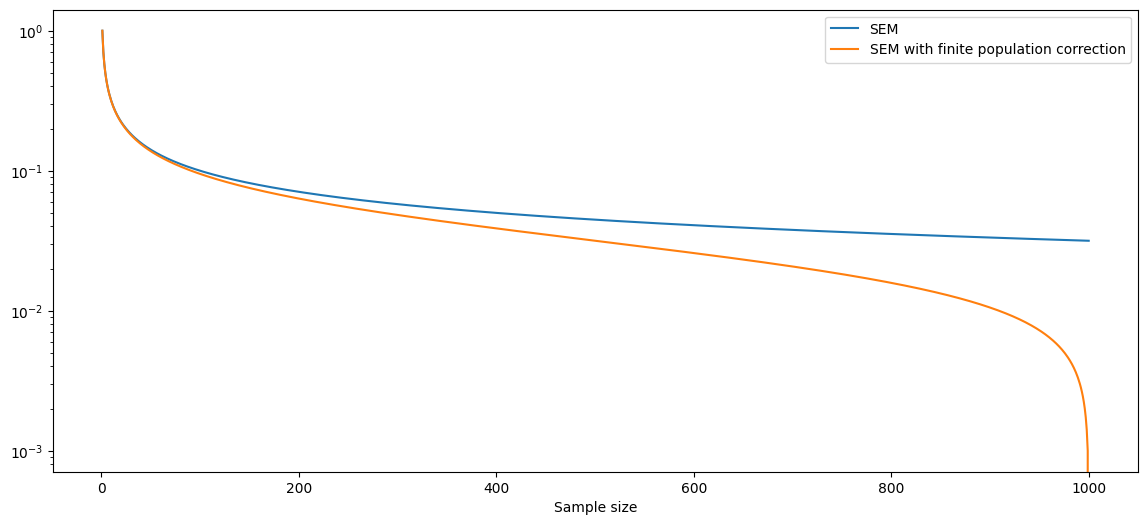

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

N = 1e3
s = 1

epsilon = 1e-9
n = np.linspace(1, N, 1000)

SEM = s / np.sqrt(n)
SEM_finite = (s / np.sqrt(n)) * np.sqrt((N - n) / (N - 1))

fig, ax = plt.subplots(1,1, figsize=(14,6))
sns.lineplot(x=n, y=SEM, label='SEM')
sns.lineplot(x=n, y=SEM_finite, label='SEM with finite population correction')
ax.set_xlabel('Sample size')
ax.set_yscale('log');

This plot helps us understand the difference in the behaviour of the SEM with and without the correction factor: we expect the SEM to be exactly 0 when $n=N$ because at that point we are considering all the elements in the population to calculate the mean. The error should drop down to 0 as $n\to N$

# Resources
* [Finite Population Correction (FPC) derivation](https://stats.stackexchange.com/questions/5158/explanation-of-finite-population-correction-factor)
* [Sampling distribution Simulation](https://onlinestatbook.com/stat_sim/sampling_dist/)
* [Bessel correction to biased estimator](https://gregorygundersen.com/blog/2019/01/11/bessel/)